In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import partial_dependence
from sklearn import datasets
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

iris = datasets.load_iris(as_frame=True)
X=iris.data
y=iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.3)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
preds = classifier.predict_proba(X_test)
preds


array([[9.78112693e-01, 2.18872726e-02, 3.42689814e-08],
       [9.44137384e-01, 5.58619772e-02, 6.39085330e-07],
       [1.45089420e-02, 9.14837016e-01, 7.06540418e-02],
       [1.20686339e-06, 9.46101346e-03, 9.90537780e-01],
       [1.90718231e-04, 1.67091149e-01, 8.32718133e-01],
       [9.60056285e-01, 3.99436284e-02, 8.65194325e-08],
       [9.37347436e-01, 6.26519746e-02, 5.88963629e-07],
       [8.69127896e-02, 9.08937589e-01, 4.14962127e-03],
       [9.86698432e-01, 1.33015584e-02, 9.76933540e-09],
       [9.92642594e-01, 7.35740156e-03, 4.74874636e-09],
       [1.03217724e-02, 7.33774966e-01, 2.55903262e-01],
       [9.68876397e-01, 3.11235249e-02, 7.82229880e-08],
       [2.36080678e-04, 9.77234105e-02, 9.02040509e-01],
       [8.59828764e-05, 9.09471255e-02, 9.08966892e-01],
       [9.81892743e-01, 1.81072295e-02, 2.79112179e-08],
       [9.70627862e-01, 2.93720784e-02, 5.98505692e-08],
       [4.31150078e-02, 9.44294970e-01, 1.25900219e-02],
       [9.70763199e-01, 2.92367

In [6]:
from sklearn.metrics import roc_auc_score

try:
  curve = roc_auc_score(y_test,preds)
except:
  curve = roc_auc_score(y_test,preds,multi_class='ovr')


In [32]:
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelBinarizer

n_classes = 3
tpr=dict()
fpr=dict()
threshhold = dict()
label_binrize = LabelBinarizer().fit(y_train)

y_test_one_hot = label_binrize.transform(y_test)
for i in range(n_classes):
    print(i)
    fpr[i],tpr[i],threshhold[i] = roc_curve(y_test_one_hot[:,i],preds[:,i])
 

0
1
2


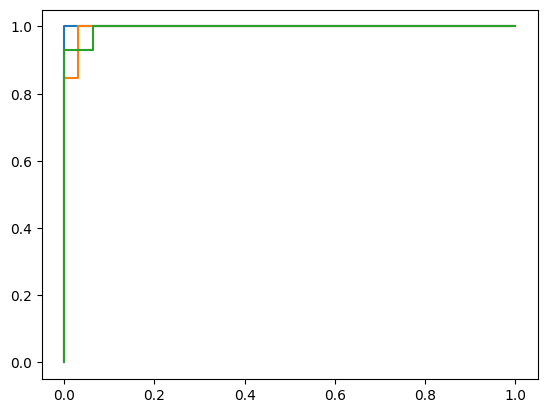

In [34]:
import matplotlib.pyplot as plt
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i],tpr[i])

In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.inspection import partial_dependence
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets (optional, but a good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Plot Partial Dependence Plot for each feature
features = [0, 1]  
pdp = partial_dependence(rf_model, X_train, features)
pdp['grid_values']



c:\Users\versu\anaconda3\envs\dl\Lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


{'grid_values': [array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
         5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
         6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.6, 7.7]),
  array([2. , 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3,
         3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.2])],
 'values': [array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
         5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
         6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.6, 7.7]),
  array([2. , 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3,
         3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.2])],
 'average': array([[[0.296     , 0.296     , 0.296     , ..., 0.31238095,
          0.31238095, 0.31238095],
         [0.296     , 0.296     , 0.296     , ..., 0.31238095,
          0.31238095, 0.31238095],
         [0.296     , 0.296     , 0.296     , ..., 0.31238095,
          0.31238095, 0.31238095],
         ...,
      

In [8]:
pdp['grid_values']


[array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
        5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
        6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.6, 7.7]),
 array([2. , 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3,
        3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.2])]

In [16]:
pdp['average'][0]


array([[0.296     , 0.296     , 0.296     , 0.296     , 0.296     ,
        0.296     , 0.296     , 0.296     , 0.30304762, 0.31304762,
        0.31580952, 0.31580952, 0.31238095, 0.31238095, 0.31238095,
        0.31238095, 0.31238095, 0.31238095, 0.31238095, 0.31238095,
        0.31238095],
       [0.296     , 0.296     , 0.296     , 0.296     , 0.296     ,
        0.296     , 0.296     , 0.296     , 0.30304762, 0.31304762,
        0.31580952, 0.31580952, 0.31238095, 0.31238095, 0.31238095,
        0.31238095, 0.31238095, 0.31238095, 0.31238095, 0.31238095,
        0.31238095],
       [0.296     , 0.296     , 0.296     , 0.296     , 0.296     ,
        0.296     , 0.296     , 0.296     , 0.30304762, 0.31304762,
        0.31580952, 0.31580952, 0.31238095, 0.31238095, 0.31238095,
        0.31238095, 0.31238095, 0.31238095, 0.31238095, 0.31238095,
        0.31238095],
       [0.296     , 0.296     , 0.296     , 0.296     , 0.296     ,
        0.296     , 0.296     , 0.296     , 0.3030476